In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
nami = pd.read_json('nami/pois')

In [4]:
ewave = pd.read_csv('easywave/eWave.poi.ssh', delim_whitespace=True)

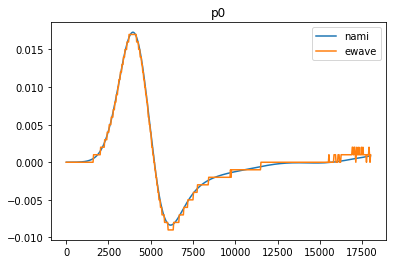

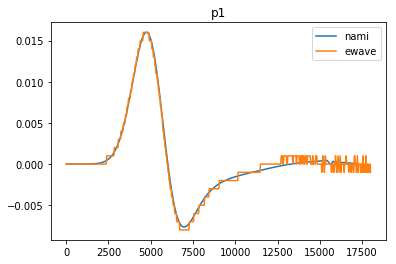

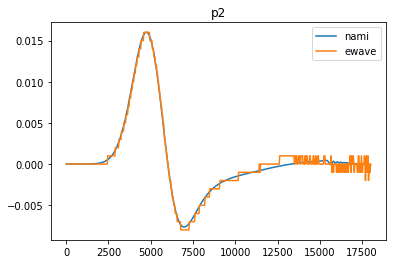

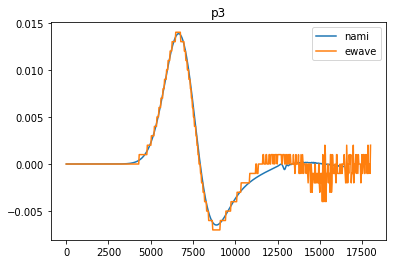

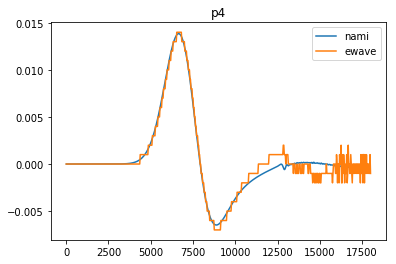

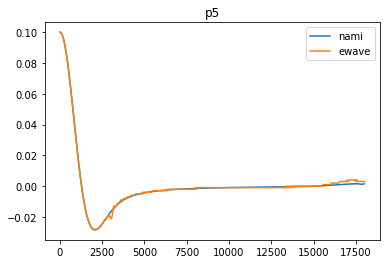

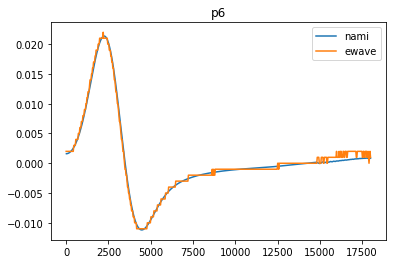

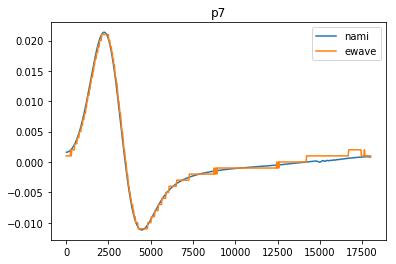

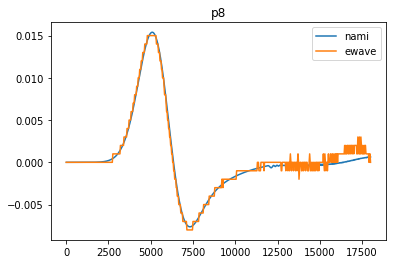

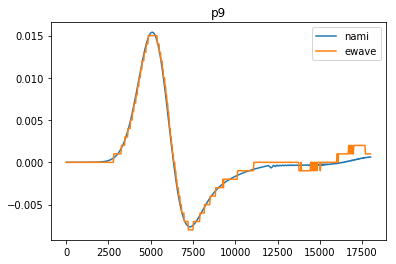

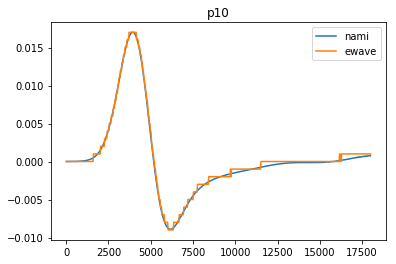

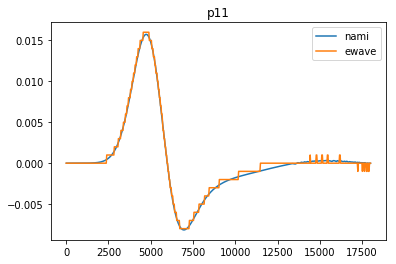

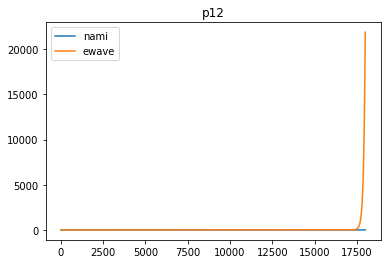

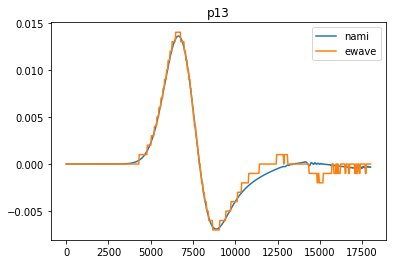

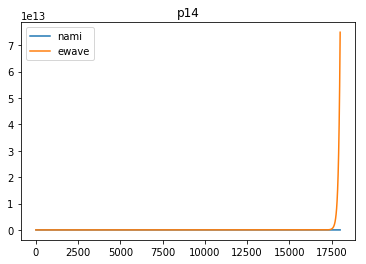

In [5]:
for n in range(15):
    key = 'p'+str(n)
    plt.figure()
    plt.plot(nami[key].time, nami[key].surface, label='nami')
    plt.plot(ewave['Minute']*60, ewave[key], label='ewave')
    plt.legend(loc=0)
    plt.title(key)

ideas

* modificar easywave para comparar la malla completa en un frame
* comparar con código escrito en python!
* revisar código de nami para ver que está corriendo el modelo correcto
* revisar código de easywave para ver que está exportando bien




In [6]:
def ew2py(fileName):
    """
        Reads EasyWave binary output into numpy arrays. 
        Works for .ssh and .sshmax files (at least).
        
        Example usage:

        lon, lat, h = ew2py(fileName)    
        plt.pcolormesh(lon,lat,h)
    """
    import struct
    from numpy import zeros, linspace

    f = open(fileName, 'rb')
    dsbb = f.read(4)

    nOutI = struct.unpack('h',f.read(2))[0]
    nOutJ = struct.unpack('h',f.read(2))[0]
    
    lonOutMin = struct.unpack('d',f.read(8))[0]
    lonOutMax = struct.unpack('d',f.read(8))[0]
    latOutMin = struct.unpack('d',f.read(8))[0]
    latOutMax = struct.unpack('d',f.read(8))[0]
    
    tmp = f.read(8)
    tmp = f.read(8)

    lon = linspace(lonOutMin,lonOutMax,nOutI)
    lat = linspace(latOutMin,latOutMax,nOutJ)
    values = zeros((nOutJ,nOutI))

    for j in range(nOutJ):
        for i in range(nOutI):
            value = f.read(4)
            value = struct.unpack('f',value)[0]
            values[j,i] = value
    return lon, lat, values

In [7]:
import time

(0.0, 501.0, 0.0, 501.0)

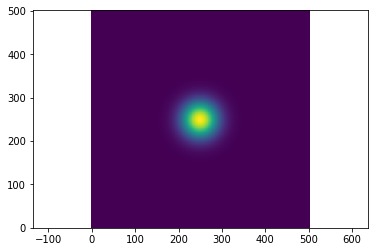

In [8]:
nami0 = np.loadtxt('nami/tlab2D',delimiter=',', skiprows=1).reshape((501,501))

plt.pcolormesh(nami0)
plt.axis('equal')

(0.0, 501.0, 0.0, 501.0)

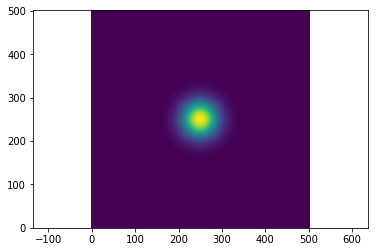

In [9]:
lon, lat, h = ew2py('easywave/eWave.2D.00000.ssh')
plt.pcolormesh(h)
plt.axis('equal')